In [1]:
from IPython.display import HTML, Image

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle Code"></form>''')

In [2]:
%run /Users/denis/Documents/Projects/scripts/init.ipy
os.chdir('/Users/denis/Documents/Projects/hiv-analysis/')

In [3]:
##### Read Data #####
### Cell Line Data
# Expression
cellLineVstDataframe = pd.read_table('hiv-cell-line-analysis/f3-normalized_expression.dir/hiv_cell_line-vst.txt', index_col='gene_symbol')

# Annotation
cellLineAnnotationDataframe = pd.read_table('hiv-cell-line-analysis/f2-annotation.dir/hiv_cell_line-annotation.txt', index_col='sample_name').sort_values('timepoint')

# Corrected expression
cellLineCombatDataframe = pd.read_table('hiv-cell-line-analysis/f4-combat.dir/hiv_cell_line-combat.txt', index_col='gene_symbol')

# Differential expression
cellLineCdDataframe = pd.read_table('hiv-cell-line-analysis/f5-characteristic_direction.dir/hiv_cell_line-combat_cd.txt', index_col='gene_symbol')

# Enrichr links
cellLineEnrichrLinkDataframe = pd.read_table('hiv-cell-line-analysis/f6-enrichr.dir/hiv_cell_line-combat_enrichr_links.txt')

# Enrichr results
cellLineEnrichrResultDataframe = pd.read_table('hiv-cell-line-analysis/f6-enrichr.dir/hiv_cell_line-combat_enrichr_results.txt')

# Drug links
cellLineSignatureLinkDataframe = pd.read_table('hiv-cell-line-analysis/f7-l1000cds2.dir/hiv_cell_line-combat_l1000cds2_links.txt')

# Drug results
cellLineSignatureResultDataframe = pd.read_table('hiv-cell-line-analysis/f7-l1000cds2.dir/hiv_cell_line-combat_l1000cds2_signatures.txt', usecols=['pert_desc', 'pubchem_id', 'aggravate', 'timepoint']).dropna()

### Podocyte Data
# Expression
podocyteVstDataframe = pd.read_table('hiv-podocyte-analysis/f3-normalized_expression.dir/hiv_podocyte-vst.txt', index_col='gene_symbol')

# Annotation
podocyteAnnotationDataframe = pd.read_table('hiv-podocyte-analysis/f2-annotation.dir/hiv_podocyte-annotation.txt', index_col='sample_name')

# Corrected expression
podocyteCombatDataframe = pd.read_table('hiv-podocyte-analysis/f4-combat.dir/hiv_podocyte-combat.txt', index_col='gene_symbol')

# Differential expression
podocyteCdDataframe = pd.read_table('hiv-podocyte-analysis/f5-characteristic_direction.dir/hiv_podocyte-combat_cd.txt', index_col='gene_symbol')

# Enrichr links
podocyteEnrichrLinkDataframe = pd.read_table('hiv-podocyte-analysis/f6-enrichr.dir/hiv_podocyte-combat_enrichr_links.txt')

# Enrichr results
podocyteEnrichrResultDataframe = pd.read_table('hiv-podocyte-analysis/f6-enrichr.dir/hiv_podocyte-combat_enrichr_results.txt')

# Drug links
podocyteSignatureLinkDataframe = pd.read_table('hiv-podocyte-analysis/f7-l1000cds2.dir/hiv_podocyte-combat_l1000cds2_links.txt')

# Drug results
podocyteSignatureResultDataframe = pd.read_table('hiv-podocyte-analysis/f7-l1000cds2.dir/hiv_podocyte-combat_l1000cds2_signatures.txt', usecols=['pert_desc', 'pubchem_id', 'aggravate', 'comparison']).dropna()

In [211]:
%%html
<style type="text/css">

p,
li {
    font-size: 11pt;
}

ul > li {
    margin-top: 10px;
}

ul > li > ul {
    padding-top: 10px;
}

ul > li > ul > li {
    margin-top: 0px;
}


ol ul > li {
    margin-top: 0px;
}

ol ul > li > li {
    margin-top: 0px;
}


</style>

In [221]:
%%html

<h1> Analysis of differential gene expression signatures induced by HIV infection of podocytes </h1>

<h2> Overview </h2>

<p>The following notebook contains the results of a computational analysis of gene expression signatures generated by HIV infection of podocytes.</p>

<p>The analysis was performed on two different datasets:</p>
<ol>
<li>
	A dataset consisting of 21 samples of <b>primary podocytes</b>, isolated from different patients.  Samples are divided in three groups:
	<ul>
		<li><i>HIV-infected</i> (7 samples)</li>
		<li><i>GFP-infected controls</i> (6 samples)</li>
		<li><i>Untreated controls</i> (8 samples)</li>
	</ul>
</li>
<br>
<li>
	A dataset consisting of 14 samples of <b>podocyte-derived cell lines</b>.  Samples were processed in three batches, and are divided in two main groups:
	<ul>
		<li><i>Untreated</i> controls (3 samples)</li>
		<li><i>HIV-infected</i> samples (11 samples), separated in the following timepoints:</li>
			<ul>
				<li><i>6 hours</i> post-infection (3 samples)</li>
				<li><i>12 hours</i> post-infection (2 samples)*</li>
				<li><i>24 hours</i> post-infection (2 samples)*</li>
				<li><i>48 hours</i> post-infection (3 samples)</li>
		</li>
	</ul>
</li>
</ol>
<p style="font-size: small;">*In order to have a minimum of 3 samples necessary to compute differential expression, the two timepoints were merged in a single 12-24 hour timepoint.</p>

<h2> Key Findings </h2>

<ul>
	<li><b>Data is significantly affected by batch effects</b>, whereby most of the variance in the data is related to the batch or patient of origin.  Computational methods partly assist in recovering the original biological variance. (<a href="#pca-analysis">link</a>)</li>
	<li>HIV-infected podocytes in both datasets display <b>overexpression</b> of genes involved in the following pathways (<a href="#enrichment-analysis">link</a>):
		<ul>
			<li><b>defense response and negative regulation of virus replication</b></li>
			<li><b>immune response and cytokine signaling</b></li>
			<li><b>TNF signaling</b></li>
		</ul>
	</li>
	<li>HIV-infected podocytes in both datasets display <b>underexpression</b> of genes associated to the <b>Polycomb-group (PcG) family</b>, including targets of the following genes (<a href="#enrichment-analysis">link</a>):
		<ul>
			<li><b>SUZ12</b></li>
			<li><b>EED</b></li>
			<li><b>KDM2B</b></li>
			<li><b>RNF2</b></li>
		</ul>
	</li>
	<li>The <b>sterol biosynthesis</b> and <b>steroid hormone response</b> pathways are commonly dysregulated in both datasets, showing both overexpression and underexpression of related terms.</li>
	<li>A number of small molecules which reproducibly mimic and reverse the HIV infection signatures are identified (<a href="#l1000cds2-analysis">link</a>): </li>
		<ul>
			<li><b>Mimic</b>: <i>CGP-60474</i>, <i>mitoxantrone</i>, <i>alvocidib</i>, and others.</li>
			<li><b>Reverse</b>: <i>Emetine Dihydrochloride Hydrate</i>, <i>QL-XII-47</i>, and others.</li>
		</ul>
	</li>
</ul>

<h2> Computational Methods </h2>

<p>Each dataset was analyzed using the following pipeline:</p>

<ol>
	<li><b>Normalize raw expression</b> levels using DESeq2's Variance Stabilizing Transformation method (<a href="https://rdrr.io/bioc/DESeq2/man/varianceStabilizingTransformation.html">1</a>).</li>
	<li>Perform a <b>Principal Components Analysis</b> (PCA) to assess separation between samples.</li>
	<li><b>Remove batch effects</b> from the data using the ComBat algorithm (<a href="https://www.bu.edu/jlab/wp-assets/ComBat/Abstract.html">2</a>).</li>
	<li>Calculate a <b>differential gene expression signature</b> using the Characteristic Direction method (<a href="http://www.maayanlab.net/CD/">3</a>).</li>
	<li>Perform an <b>enrichment analysis</b> of the top 500 most overexpressed and underexpressed genes using Enrichr (<a href="http://amp.pharm.mssm.edu/Enrichr/">4</a>)</li>
	<li>Identify <b>small molecule perturbations</b> which <b>mimic or reverse</b> the gene expression signatures identified in step 4. (<a href="http://amp.pharm.mssm.edu/L1000CDS2/#/index">5</a>)</li>
</ol>

<h2> Results </h2>

<h3 id="pca-analysis"> 1. PCA Analysis </h3>

<p>In order to assess the separation between samples in an unbiased manner, a Principal Components Analysis (PCA) was performed on both datasets.</p>
<p>The PCA analysis on the <b>primary podocyte dataset</b> (<i>Figure 1A</i>) shows that <b>similarly treated samples do not clearly cluster together</b>. This might be due to the presence of batch effects, as some samples coming from the same patient cluster together, independently of the biological treatment. The same analysis was repeated after batch effect removal by ComBat (<i>Figure 1B</i>).  The algorithm was able to correct the dataset in order to ensure a better separation between samples which underwent similar biological treatment .</p>


In [128]:
podocyteAnnotationDataframe['treatment_label'] = [x.replace('_', ' ').title().replace('Gfp', 'GFP').replace('Hiv', 'HIV') for x in podocyteAnnotationDataframe['treatment']]
podocyteAnnotationDataframe['annotation'] = ['%(treatment_label)s sample<br>Patient %(patient)s' % locals() for treatment_label, patient in podocyteAnnotationDataframe[['treatment_label', 'patient']].as_matrix()]
plot3DPCA(podocyteVstDataframe, podocyteAnnotationDataframe, 'treatment_label', 'annotation', topVarianceGenes=5000, colors=['#377eb8','#4daf4a','#e41a1c'], title='<b>1A.</b> PCA Analysis of <i>primary podocyte dataset</i>, uncorrected<br>(colored by treatment)')

In [129]:
plot3DPCA(podocyteCombatDataframe, podocyteAnnotationDataframe, 'treatment_label', 'annotation', topVarianceGenes=5000, colors=['#377eb8','#4daf4a','#e41a1c'], title='<b>1B.</b> PCA Analysis of <i>primary podocyte dataset</i>, corrected<br>(colored by treatment)')

In [134]:
%%html
<p>The PCA analysis on the <b>cell line dataset</b> (<i>Figure 2A</i>) shows that <b>samples strongly cluster by batch</b>. This batch effect overrides the variance contributed by the HIV infection treatment.  The same analysis was repeated after batch effect removal by ComBat (<i>Figure 2B</i>).  As above, the algorithm was able to correct the dataset in order to ensure a somewhat better separation between samples which underwent similar biological treatment .</p>

In [130]:
cellLineAnnotationDataframe['annotation'] = ['%(treatment)s sample<br>Batch %(batch)s<br>%(timepoint)sh timepoint<br>' % locals() for batch, timepoint, treatment in cellLineAnnotationDataframe[['batch', 'timepoint', 'treatment']].as_matrix()]
cellLineAnnotationDataframe['batch_label'] = ['Batch '+str(x) for x in cellLineAnnotationDataframe['batch']]
plot3DPCA(cellLineVstDataframe, cellLineAnnotationDataframe, 'batch_label', 'annotation', topVarianceGenes=5000, colors=['#e41a1c','#377eb8','#4daf4a'], title='<b>2A.</b> PCA Analysis of <i>cell line dataset</i>, uncorrected<br>(colored by batch)', )

In [131]:
cellLineAnnotationDataframe['timepoint_label'] = [str(x)+' hours' for x in cellLineAnnotationDataframe['timepoint']]
plot3DPCA(cellLineCombatDataframe, cellLineAnnotationDataframe, 'timepoint_label', 'annotation', topVarianceGenes=5000, title='<b>2B.</b> PCA Analysis of <i>cell line dataset</i>, corrected<br>(colored by timepoint)', colors=['#2c7bb6','#fecc5c','#fd8d3c','#f03b20','#bd0026'][::1])

In [222]:
%%html
<h3 id="enrichment-analysis"> 2. Enrichment Analysis </h3>

<p>In order to investigate the <b>commonly dysregulated pathways following HIV infection podocytes</b>, an enrichment analysis was performed on the differential gene expression signatures calculated comparing untreated samples to infected samples.</p>

<p>The enrichment analysis in the <b>primary podocyte dataset</b> reveals the following: </p>
<ul>
	<li><b>Upregulation</b> of genes involved in pathways relative to <b>immune response</b> and <b>inflammation</b>.  Enriched terms include <i>defense response to virus</i>, <i>cytokine-mediated signaling pathway</i>, and <i>negative regulation of viral genome replication</i></li>
	<li><b>Downregulation</b> of genes involved in pathways relative to <b>cell proliferation</b> and <b>cell migration</b>.  Enriched terms include <i>regulation of kidney development</i>, <i>leukocyte transendothelial migration</i>, and <i>stress fiber</i></li>
	<li><b>Dysregulation</b> of genes involved in <b>sterol biosynthesis and response</b>. Upregulated genes are enriched for terms such as <i>cholesterol biosynthetic process</i> and <i>abnormal lipid homeostasis</i>, while downregulated genes are enriched for terms such as <i>response to steroid hormone</i> and <i>response to estrogen</i>.
</ul>

<p>Full results available <a href="#enrichment-results">here</a>.</p>


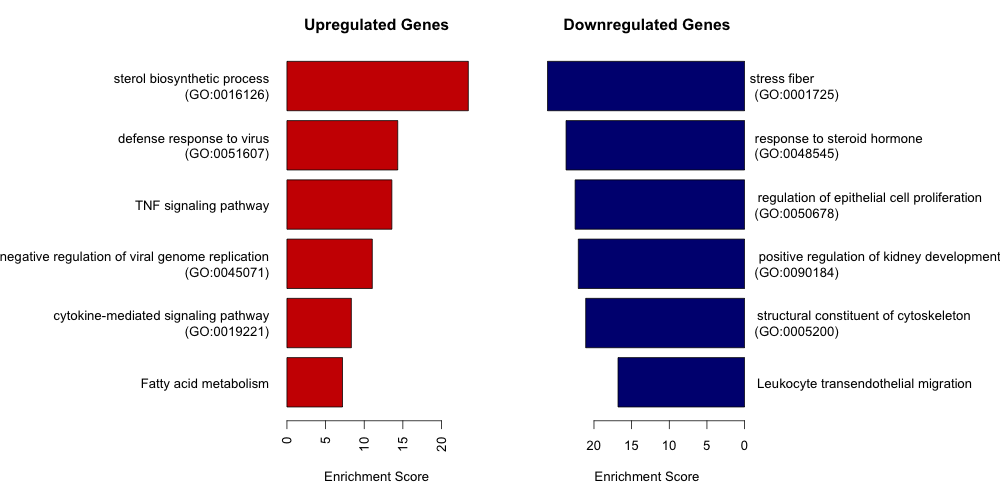

In [137]:
%%R -h 500 -w 1000 -i podocyteEnrichrResultDataframe
upTerms <- c('TNF signaling pathway_Homo sapiens_hsa04668', 'negative regulation of viral genome replication (GO:0045071)', 'sterol biosynthetic process (GO:0016126)', 'cytokine-mediated signaling pathway (GO:0019221)', 'Fatty acid metabolism_Homo sapiens_hsa01212', 'defense response to virus (GO:0051607)')
upPlotDataframe <- subset(podocyteEnrichrResultDataframe, comparison == 'gfp_infected_v_hiv_infected' & geneset == 'upregulated')
rownames(upPlotDataframe) <- upPlotDataframe$term_name
upPlotDataframe <- upPlotDataframe[upTerms,]
upPlotDataframe <- upPlotDataframe[order(upPlotDataframe$combined_score),]

dnTerms <- c('positive regulation of kidney development (GO:0090184)', 'stress fiber (GO:0001725)', 'response to steroid hormone (GO:0048545)', 'regulation of epithelial cell proliferation (GO:0050678)', 'Leukocyte transendothelial migration_Homo sapiens_hsa04670', 'structural constituent of cytoskeleton (GO:0005200)')
dnPlotDataframe <- subset(podocyteEnrichrResultDataframe, comparison == 'gfp_infected_v_hiv_infected' & geneset == 'downregulated')
rownames(dnPlotDataframe) <- dnPlotDataframe$term_name
dnPlotDataframe <- dnPlotDataframe[dnTerms,]
dnPlotDataframe <- dnPlotDataframe[order(dnPlotDataframe$combined_score),]
prepNames <- function(x) { sapply(x, function(y) gsub(' (', '\n (', strsplit(y, '_Homo')[[1]][1], fixed=TRUE))}
par(mfrow=c(1,2), cex=1.1)
par(mar=c(5,18,3,2))
barplot(upPlotDataframe[,3], names=prepNames(rownames(upPlotDataframe)), las=2, horiz=TRUE, main='Upregulated Genes', col='red3', xlab='Enrichment Score')
par(mar=c(5,3,3,16))
barpos <- barplot(-dnPlotDataframe[,3], names=rep('', nrow(dnPlotDataframe)), las=2, horiz=TRUE, main='Downregulated Genes', col='navyblue', axes=FALSE, xlab='Enrichment Score')
mtext(prepNames(rownames(dnPlotDataframe)), side=4, at=barpos, las=2, adj=-0.05, cex=1.1)
axis(1, at=seq(0, -20, by=-5), labels=seq(0, 20, 5))

In [183]:
%%html

<p>The enrichment analysis in the <b>cell line dataset</b> reveals the following: </p>
<ul>
	<li><b>Upregulation</b> of genes involved in <b>defense response to virus</b>, and <b>TNF signaling</b> at the 6 hour timepoint, reaching a peak of enrichment at the 48 hour timepoint.</li>
	<li><b>Upregulation</b> of genes involved in <b>steroid binding</b> at the 6 hour timepoint, which decreases in the latter timepoints.</li>
	<li><b>Downregulation</b> of genes involved in pathways relative to <b>cell metabolism</b> and the <b>mitochondrion</b> at the 6 hour timepoint, decreasing in the latter timepoints.  Enriched terms include <i>mitochondrial respiratory chain complex I</i>, <i>NADH dehydrogenase activity</i>, and <i>ubiquinone biosynthetic process</i></li>
	<li><b>Downregulation</b> of genes involved in <b>kinase inhibition</b>, reaching a peak at the 12 hour timepoint.  Enriched terms include <i>kinase regulator activity</i>, and <i>cyclin-dependent protein serine/threonine kinase regulator activity</i>.</li>
</ul>

<p>Full results available <a href="#enrichment-results">here</a>.</p>



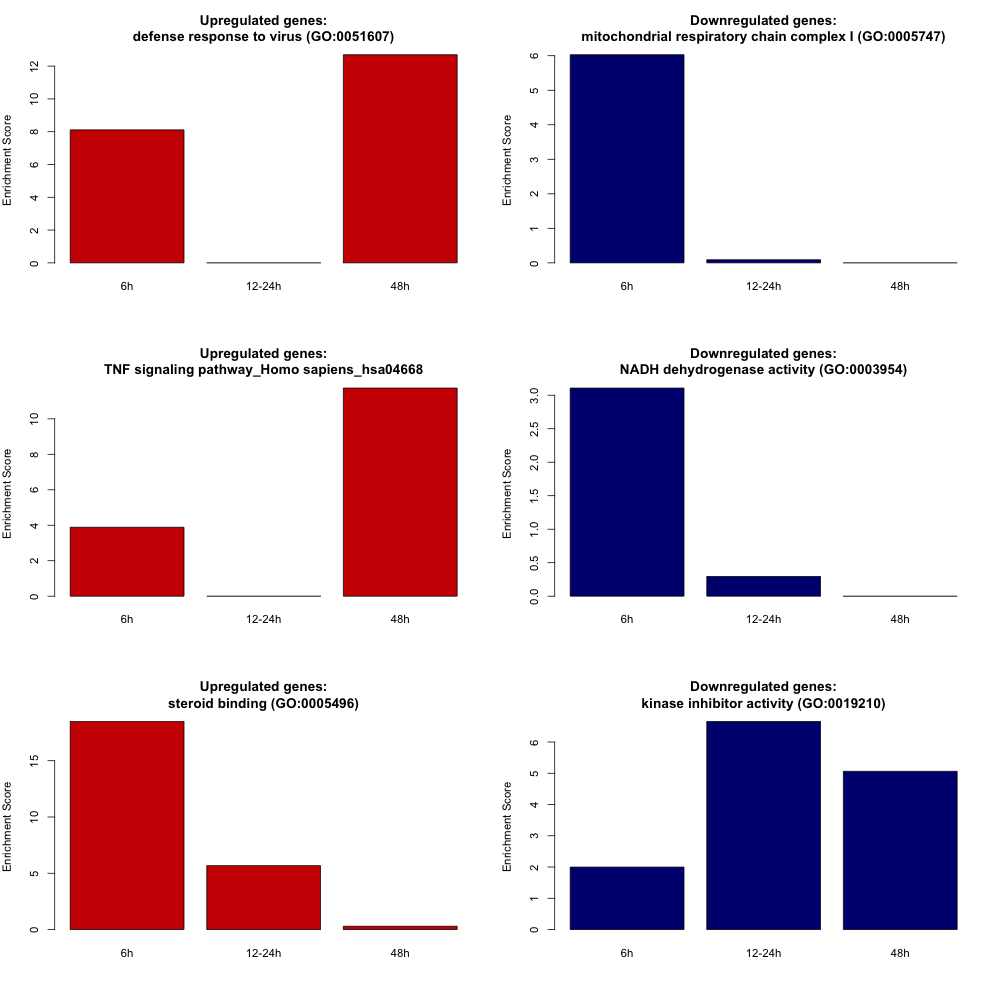

In [154]:
%%R -i cellLineEnrichrResultDataframe -h 1000 -w 1000
# Get terms
up_term_names <- c('defense response to virus (GO:0051607)',
                   'TNF signaling pathway_Homo sapiens_hsa04668',
                   'steroid binding (GO:0005496)')

# Get terms
dn_term_names <- c('kinase inhibitor activity (GO:0019210)',
                   'NADH dehydrogenase activity (GO:0003954)',
                   'mitochondrial respiratory chain complex I (GO:0005747)')

# Get dataframe
upPlotDataframe <- cellLineEnrichrResultDataframe[(cellLineEnrichrResultDataframe$term_name %in% up_term_names) & (cellLineEnrichrResultDataframe$geneset=='upregulated'),]
upPlotDataframe <- dcast(term_name ~ timepoint, data=upPlotDataframe, value.var='combined_score', fill=0)[,c('term_name', '6h', '12-24h', '48h')]
rownames(upPlotDataframe) <- upPlotDataframe$term_name
upPlotDataframe$term_name <- NULL
upPlotDataframe[upPlotDataframe < 0] <- 0

# Get dataframe
dnPlotDataframe <- cellLineEnrichrResultDataframe[(cellLineEnrichrResultDataframe$term_name %in% dn_term_names) & (cellLineEnrichrResultDataframe$geneset=='downregulated'),]
dnPlotDataframe <- dcast(term_name ~ timepoint, data=dnPlotDataframe, value.var='combined_score', fill=0)[,c('term_name', '6h', '12-24h', '48h')]
rownames(dnPlotDataframe) <- dnPlotDataframe$term_name
dnPlotDataframe$term_name <- NULL
dnPlotDataframe[dnPlotDataframe < 0] <- 0

# Concatenate
plotDataframe <- rbind(upPlotDataframe, dnPlotDataframe)
par(mfrow=c(3,2), cex=0.95)

for (i in c(1,5,3,6,2,4)) {
    if (i %in% c(1,2,3)) {
        par(mar=c(5,4,4,2))
        barplot(as.numeric(plotDataframe[i,]), names.arg=colnames(plotDataframe), main=paste0('Upregulated genes:\n', rownames(plotDataframe)[i]), col='red3', ylab='Enrichment Score')
    } else {
        barpos <- barplot(as.numeric(plotDataframe[i,]), names.arg=colnames(plotDataframe), main=paste0('Downregulated genes:\n', rownames(plotDataframe)[i]), col='navyblue', ylab='Enrichment Score')
    }
}

In [184]:
%%html
<p>A <b>comparison of enrichment results</b> between the primary podocyte and the cell-line 48 hour HIV infection signatures reveal several commonly enriched pathways:</p>
<ul>
	<li><b>Upregulation</b> of genes involved in <b>defense response</b>, <b>negative regulation of viral genome replication</b>, and <b>TNF signaling</b>.</li>
	<li><b>Downregulation</b> of genes associated to the <b>Polycomb-group (PcG) family</b>, including targets of <b>SUZ12</b>, <b>EED</b>, <b>KDM2B</b>, and <b>RNF2</b>.</li>
</ul>

In [159]:
# Calculate logFDR
cellLineEnrichrResultDataframe['logFDR'] = -np.log10(cellLineEnrichrResultDataframe['FDR'])
podocyteEnrichrResultDataframe['logFDR'] = -np.log10(podocyteEnrichrResultDataframe['FDR'])

# Add annotation
cellLineEnrichrResultDataframe['annotation'] = ['Cell Line FDR = '+'{:.2e}'.format(x) for x in cellLineEnrichrResultDataframe['FDR']]
podocyteEnrichrResultDataframe['annotation'] = ['Podocyte FDR = '+'{:.2e}'.format(x) for x in podocyteEnrichrResultDataframe['FDR']]

# Loop through genesets
for geneset in ['upregulated', 'downregulated']:
    
# Loopthrough timepoints
    for timepoint in ['48h']:#set(cellLineEnrichrResultDataframe['timepoint']):

# Loop through comparisons
        for comparison in ['gfp_infected_v_hiv_infected']:#set(podocyteEnrichrResultDataframe['comparison']):
        
            letter = 'A' if geneset == 'upregulated' else 'B'

            trace = plotPairwiseScatter(cellLineEnrichrResultDataframe,
                                podocyteEnrichrResultDataframe,
                                indexColumn = 'term_name',
                                valueColumn = 'logFDR',
                                annotationColumn = 'annotation',
                                commonFilters={'geneset': geneset},
                                xFilters={'timepoint': timepoint},
                                yFilters={'comparison': comparison},
                                xlab='Enrichment in Cell Line Data<br>(log<sub>10</sub>p, pre-infection vs ' + timepoint + ' post-infection)',
                                ylab='Enrichment in Podocyte Data<br>(log<sub>10</sub>p, ' + 'HIV-infected vs GFP-infected' + ')',
                                title='<b>5'+letter+'.</b> Comparison of enrichment results,<br><i>' + geneset + '</i> genes',
                                cutoff=-np.log10(0.05),
                                symm=True,
                                size=700)


In [223]:
%%html

<h3 id="l1000cds2-analysis"> 3. Small Molecule Identification </h3>

<h4>Overview</h4>

<p>In order to identify <b>small molecules which mimic or reverse HIV infection signatures</b>, a query was performed using L1000CDS<sup>2</sup> with the following differential gene expression signatures:
<br>
<ul>
	<li>The <b>primary podocyte</b> signature, <i>HIV-infected vs. GFP-infected</i></li>
	<li>The <b>podocyte cell line</b> signatures, <i>HIV-infected vs. uninfected controls</i> at the following timepoints:
		<ul>
			<li><i>6 hours post-infection</i></li>
			<li><i>12-24 hours post-infection</i></li>
			<li><i>48 hours post-infection</i></li>
		</ul>
	</li>
</ul>

<p>For each of these, the top 50 most similar and most opposite signatures were identified amongst the library of small molecule perturbations from L1000.  Drugs were then ranked according to how frequently they appeared within the top 50 signatures.</p>

<h4>Results</h4>

<p>The analysis revealed the following results:</p>
<ul>
	<li><b>CGP-60474</b> (<a href="https://pubchem.ncbi.nlm.nih.gov/compound/644215">link</a>), a dual CDK1/CDK2 inhibitor, reproducibly mimics the later timepoints of cell line HIV infection (12, 24, and 48 hours), as well as the HIV infection signature in primary podocytes.  The function of the compound is not well characterized.</li>
	<br>
    <li><b>Mitoxantrone</b> (<a href="https://pubchem.ncbi.nlm.nih.gov/compound/4212">link</a>), a topoisomerase inhibitor, is ranked within the top mimics for all the HIV infection signatures.
		<ul>
            <li>It is an <b>FDA-approved drug</b> used for treatment of multiple sclerosis, prostate cancer and certain types of leukemia.</li>
			<li> 
				It has been shown to <b>inhibit viral replication and assembly</b> in independent studies (<a href="https://www.ncbi.nlm.nih.gov/pubmed/22182595">Altmann et al., Antiviral Res. 2012</a>, <a href="https://www.ncbi.nlm.nih.gov/pubmed/17928345">Deng et al., J Virol. 2007</a>)
			</li>
		</ul>
	</li>
    <br>
	<li><b>Emetine Dihydrochloride Hydrate</b> (<a href="https://pubchem.ncbi.nlm.nih.gov/compound/emetine">link</a>), a natural plant alkaloid, is ranked within the top reversing drugs for all HIV infection signatures.  
		<ul>
			<li>
				Emetine has been shown to <b>inhibit HIV-1 replication</b> by interfering with reverse transcriptase activity (<a href="https://www.ncbi.nlm.nih.gov/pubmed/26111177">Chaves et al., Molecules 2015</a>).
			</li>
			<li>
				It has also been shown to display <b>antiviral activity against human Cytomegalovirus</b> (<a href="https://www.ncbi.nlm.nih.gov/pubmed/27336364">Mukhopadhyay et al, PLoS Pathog. 2016</a>) and <b>Dengue virus</b> (<a href="https://www.omicsonline.org/open-access/antiviral-activity-of-emetine-dihydrochlorideagainst-dengue-virus-infection-jaa-1000009.php?aid=74546">Low et al., J. Antivirals & Antiretrovirals 2009</a>)
			</li>
		</ul>
	</li>
    <br>
    <li><b>QL-XII-47</b> (<a href="https://lincs.hms.harvard.edu/db/sm/10077-101-1/">link</a>), a kinase inhibitor, is ranked within the top reversing drugs for all but one of the HIV infection signatures.  
		<ul>
			<li>
				It has been shown to act as a <b>broad-spectrum antiviral agent</b> against dengue and other RNA viruses (<a href="http://pubs.acs.org/doi/abs/10.1021/acsmedchemlett.7b00008">Liang et al., ACS Med. Chem. Lett. 2017</a>).
			</li>
		</ul>
	</li>
</ul>
<br>
<p>Full results available <a href="#l1000cds2-results">here</a>.</p>

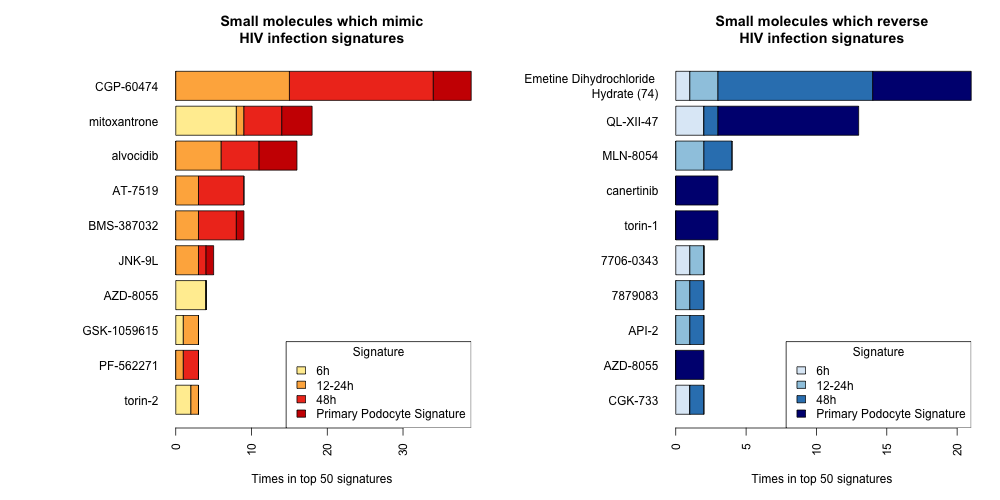

In [81]:
%%R -h 500 -w 1000 -i podocyteSignatureResultDataframe,cellLineSignatureResultDataframe
source('/Users/denis/Documents/Projects/scripts/Support.R')

# Podocyte
podocyteSignatureResultDataframe <- podocyteSignatureResultDataframe[podocyteSignatureResultDataframe$comparison=='gfp_infected_v_hiv_infected',]
podocyteSignatureResultDataframe$pert_desc <- gsub('Hydrate', '\nHydrate', podocyteSignatureResultDataframe$pert_desc)
podocyteSignatureResultDataframe$pert_desc <- gsub('2,4', '\n2,4', podocyteSignatureResultDataframe$pert_desc, fixed=TRUE)

# Cell line
cellLineSignatureResultDataframe$timepoint <- as.character(cellLineSignatureResultDataframe$timepoint)
cellLineSignatureResultDataframe$pert_desc <- gsub('myristate-', 'myristate-\n', cellLineSignatureResultDataframe$pert_desc)
cellLineSignatureResultDataframe$pert_desc <- gsub('Hydrate', '\nHydrate', cellLineSignatureResultDataframe$pert_desc)
cellLineSignatureResultDataframe$pert_desc <- gsub('dihydrochloride', '\ndihydrochloride', cellLineSignatureResultDataframe$pert_desc)

# Merge
podocyteSignatureResultDataframe$timepoint <- 'Primary Podocyte Signature'
signatureDataframe <- rbind(cellLineSignatureResultDataframe, podocyteSignatureResultDataframe[,colnames(cellLineSignatureResultDataframe)])

# Plot
par(mar=c(5,12,4,2), mfrow=c(1,2))
cellLineMimicCounts <- getL1000CDS2Counts(signatureDataframe, aggravate=TRUE, group='timepoint', order=c(3,1,2,4), main='Small molecules which mimic\nHIV infection signatures', legendTitle='Signature', col=c('#ffeda0','#feb24c','#f03b20','red3'))
cellLineReverseCounts <- getL1000CDS2Counts(signatureDataframe, aggravate=FALSE, group='timepoint', order=c(3,1,2,4), main='Small molecules which reverse\nHIV infection signatures', legendTitle='Signature', col=c('#deebf7','#9ecae1','#3182bd', 'navyblue'))

In [192]:
%%html
<h2> Full Results </h2>
<h3>Enrichment Analysis</h3>
<p id="enrichment-results"> Full results for the enrichment analyses are available at the following links:</p>
<p><b>Primary Podocyte Analysis</b></p>

In [17]:
# Add link
podocyteEnrichrLinkDataframe['Results Link'] = ['<a href="%(x)s">%(x)s</a>' % locals() for x in podocyteEnrichrLinkDataframe['URL']]

# Get subset
podocyteEnrichrLinkDataframeSubset = podocyteEnrichrLinkDataframe[podocyteSignatureLinkDataframe['comparison'] == 'gfp_infected_v_hiv_infected']


# Get links
pd.set_option('display.max_colwidth', -1)
HTML(podocyteEnrichrLinkDataframeSubset[['geneset','Results Link']].to_html(escape=False))

In [194]:
%%html
<p><b>Cell Line Analysis</b></p>

In [18]:
# Add link
cellLineEnrichrLinkDataframe['link'] = ['<a href="%(x)s">%(x)s</a>' %locals() for x in cellLineEnrichrLinkDataframe['URL']]

# Cast
linkDataframe = cellLineEnrichrLinkDataframe.pivot(index='timepoint', columns='geneset', values='link')

# Display
pd.set_option('display.max_colwidth', -1)
HTML(linkDataframe.ix[[2,0,1],:].to_html(escape=False))

In [202]:
%%html
<p><b>Interactive Heatmap for Cell line enrichment results</b></p>
<p><b>Upregulated</b></p>

In [198]:
cellLineEnrichrResultDataframe['logFDR'] = -np.log10(cellLineEnrichrResultDataframe['FDR'])
cellLineEnrichrResultDataframeCast = cellLineEnrichrResultDataframe[cellLineEnrichrResultDataframe['geneset']=='upregulated'].pivot(index='term_name', columns='timepoint', values='logFDR').fillna(0)
plotClustergrammerWidget(cellLineEnrichrResultDataframeCast, topVarianceGenes=100)

In [203]:
%%html
<p><b>Downregulated</b></p>

In [199]:
cellLineEnrichrResultDataframe['logFDR'] = -np.log10(cellLineEnrichrResultDataframe['FDR'])
cellLineEnrichrResultDataframeCast = -cellLineEnrichrResultDataframe[cellLineEnrichrResultDataframe['geneset']=='downregulated'].pivot(index='term_name', columns='timepoint', values='logFDR').fillna(0)
plotClustergrammerWidget(cellLineEnrichrResultDataframeCast, topVarianceGenes=100)

In [196]:
%%html
<h3>Small Molecule Search</h3>
<p id="l1000cds2-results"> Full results for the enrichment analyses are available at the following links:</p>
<p><b>Primary Podocyte Analysis</b></p>

In [19]:
# Get subset
podocyteSignatureLinkDataframe = podocyteSignatureLinkDataframe[podocyteSignatureLinkDataframe['comparison'] == 'gfp_infected_v_hiv_infected']

# Add link
podocyteSignatureLinkDataframe['Results Link'] = ['<a href="%(x)s">%(x)s</a>' % locals() for x in podocyteSignatureLinkDataframe['URL']]

# Add label
podocyteSignatureLinkDataframe['Direction'] = ['Mimic' if x else 'Reverse' for x in podocyteSignatureLinkDataframe['aggravate']]

# Get links
pd.set_option('display.max_colwidth', -1)
HTML(podocyteSignatureLinkDataframe[['Direction','Results Link']].to_html(escape=False))

In [197]:
%%html
<p><b>Cell Line Analysis</b></p>

In [20]:
# Add link
cellLineSignatureLinkDataframe['link'] = ['<a href="%(x)s">http://amp.pharm.mssm.edu/L1000CDS2/...</a>' % locals() for x in cellLineSignatureLinkDataframe['URL']]

# Get links
linkDataframe = cellLineSignatureLinkDataframe.pivot(index='timepoint', columns='aggravate', values='link')
pd.set_option('display.max_colwidth', -1)
HTML(linkDataframe.ix[[2,0,1],:].rename(columns={False: 'Reverse', True: 'Mimic'}).to_html(escape=False))